In [44]:
import cv2
from PIL import Image
import random
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import json

In [45]:
coco = json.load(open('../datasets/cocotext.v2.json'))

In [46]:
coco.keys()

dict_keys(['cats', 'anns', 'imgs', 'imgToAnns', 'info'])

In [47]:
len(coco['imgs'])

53686

In [48]:
# coco['imgs'].keys()

In [67]:
coco['imgs']['217925']

{'id': 217925,
 'set': 'train',
 'width': 512,
 'file_name': 'COCO_train2014_000000217925.jpg',
 'height': 640}

In [50]:
coco['anns']['45346']

{'mask': [468.9, 286.7, 468.9, 295.2, 493.0, 295.8, 493.0, 287.2],
 'class': 'machine printed',
 'bbox': [468.9, 286.7, 24.1, 9.1],
 'image_id': 217925,
 'id': 45346,
 'language': 'english',
 'area': 206.06,
 'utf8_string': 'New',
 'legibility': 'legible'}

In [51]:
coco['anns']['45346']

{'mask': [468.9, 286.7, 468.9, 295.2, 493.0, 295.8, 493.0, 287.2],
 'class': 'machine printed',
 'bbox': [468.9, 286.7, 24.1, 9.1],
 'image_id': 217925,
 'id': 45346,
 'language': 'english',
 'area': 206.06,
 'utf8_string': 'New',
 'legibility': 'legible'}

In [109]:
def ann_filter(v):
    if v['utf8_string'] in [None, '']:
        return False
    box = v['bbox']   
    if box[2] < 20 or box[3] < 20:
        return False
    return True

ann_data = [v for k, v in coco['anns'].items() if ann_filter(v)]

In [110]:
sample_data = random.sample(ann_data, 100)
sample_data[0]

{'mask': [388.3, 104.9, 383.9, 134.7, 400.3, 136.0, 407.0, 107.6],
 'class': 'machine printed',
 'bbox': [383.9, 104.9, 23.1, 31.1],
 'image_id': 139679,
 'id': 15535,
 'language': 'english',
 'area': 521.81,
 'utf8_string': '0',
 'legibility': 'legible'}

NAVY
(424, 640, 3) 148 196 576 611


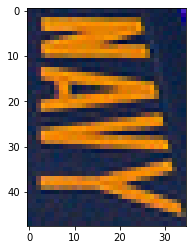

 
(425, 640, 3) 394 421 533 627


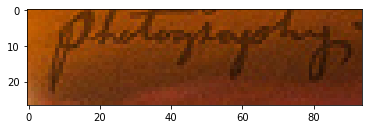

Vegan
(375, 500, 3) 229 249 450 493


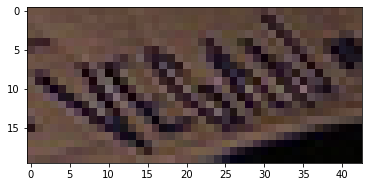

PRETZELS
(500, 376, 3) 458 494 62 116


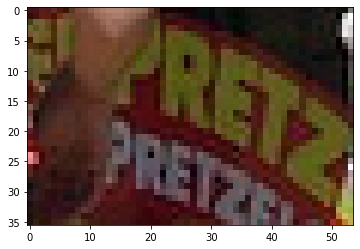

HOTEL
(640, 480, 3) 98 379 319 375


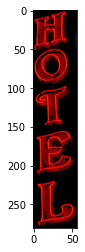

CO
(640, 428, 3) 251 275 203 226


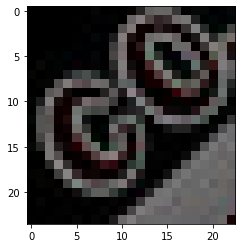

10
(375, 500, 3) 59 80 392 418


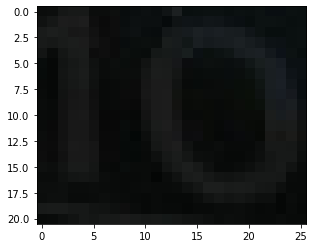

Charging
(640, 425, 3) 396 422 95 153


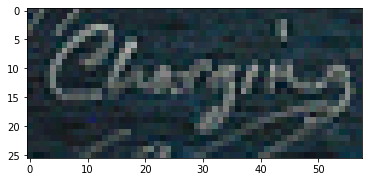

Chicken
(427, 640, 3) 314 336 220 271


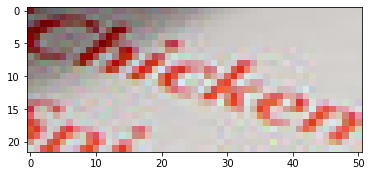

TODAY
(426, 640, 3) 109 141 235 342


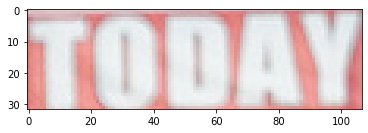

STOP
(427, 640, 3) 253 292 426 489


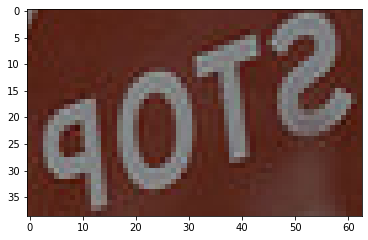

204
(500, 440, 3) 78 111 89 161


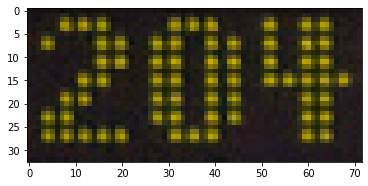

OLYMPIC
(640, 480, 3) 88 125 254 361


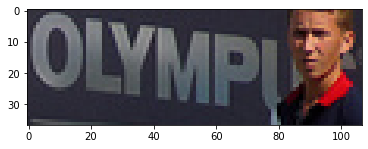

pabolinho
(427, 640, 3) 132 163 355 467


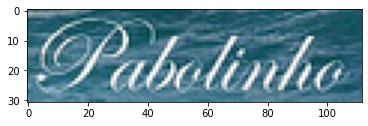

sexy
(640, 480, 3) 125 160 196 234


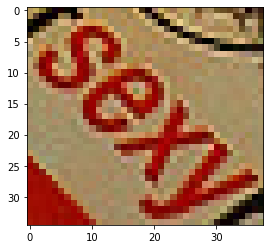

MARMALADE
(480, 640, 3) 145 170 466 545


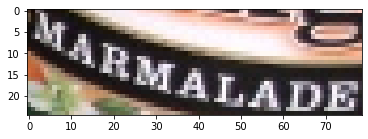

APP
(426, 640, 3) 73 102 384 441


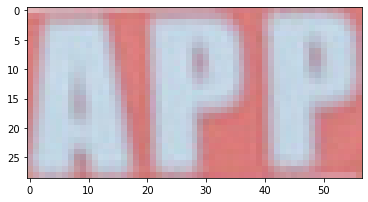

FUSO
(425, 640, 3) 282 327 312 428


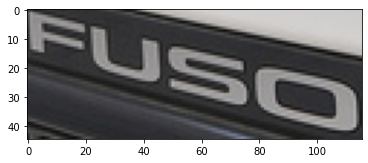

White
(427, 640, 3) 194 223 36 65


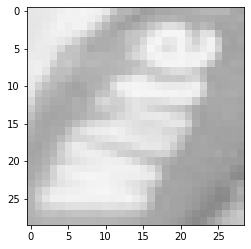

TO
(410, 640, 3) 71 91 138 179


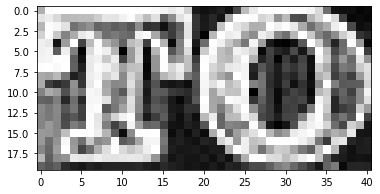

CHURCH
(640, 480, 3) 343 372 282 347


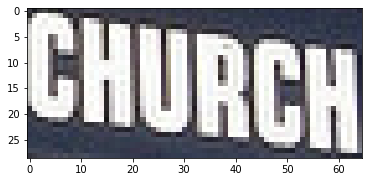

COT
(640, 480, 3) 423 445 235 270


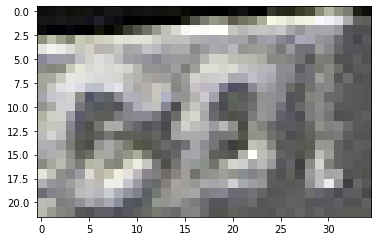

Fifty
(638, 640, 3) 310 367 439 571


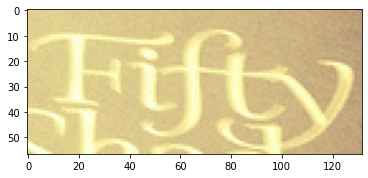

cubicle
(375, 500, 3) 150 178 126 217


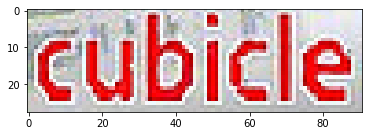

Leo
(425, 640, 3) 198 225 264 298


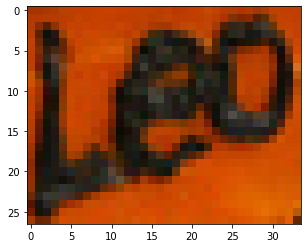

00
(480, 640, 3) 225 245 96 129


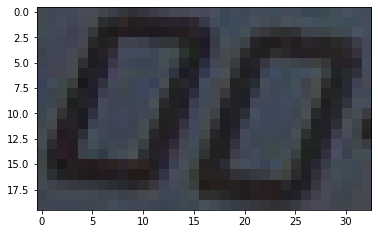

Cri
(480, 640, 3) 317 354 191 234


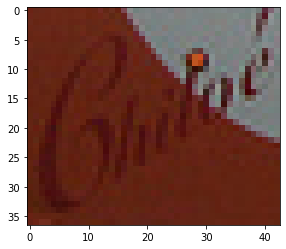

THEATRE
(486, 640, 3) 22 82 463 531


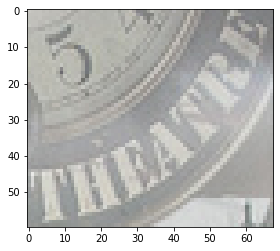

AM
(400, 600, 3) 195 234 0 42


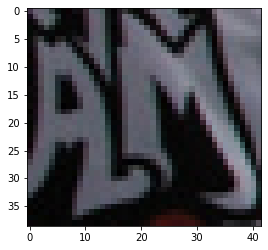

Phone
(423, 640, 3) 22 47 285 319


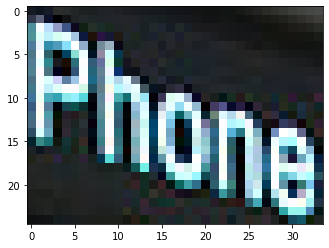

FRANCE
(480, 640, 3) 136 157 606 640


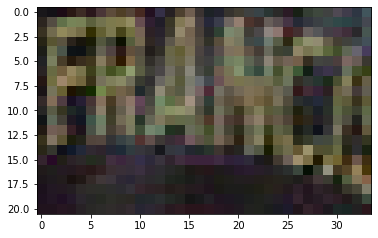

albel
(428, 640, 3) 315 337 510 543


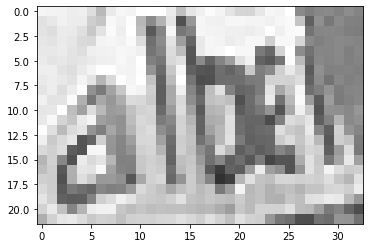

LIBRARY
(500, 375, 3) 156 182 168 237


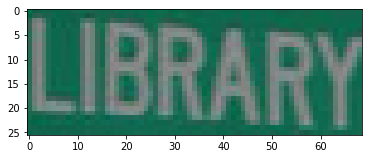

STOP
(426, 640, 3) 237 311 115 277


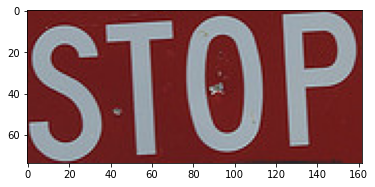

Sams
(640, 453, 3) 320 344 96 129


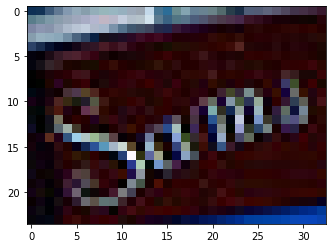

STOP
(640, 480, 3) 80 304 195 445


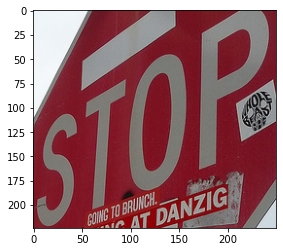

TO
(480, 640, 3) 351 372 237 264


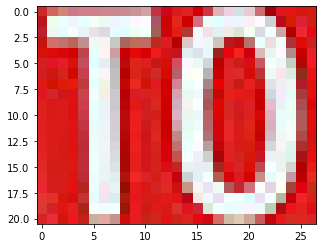

HAPPY
(480, 640, 3) 124 184 149 345


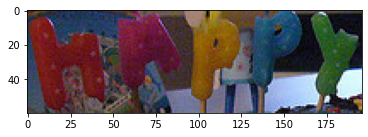

20
(428, 640, 3) 25 66 110 188


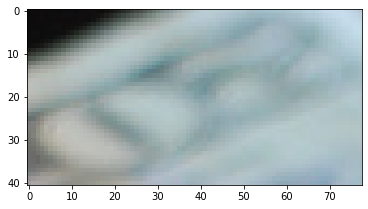

NIGHT
(427, 640, 3) 161 187 205 233


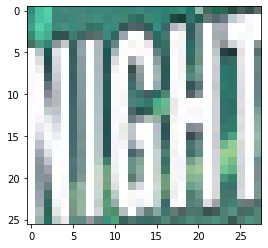

YS
(490, 640, 3) 18 106 -1 207


error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [113]:
for s in ann_data:
    d = coco['imgs'][str(s['image_id'])]
    im = cv2.imread('../datasets/train2014/' + d['file_name'])
    # plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    # plt.show()
    box = s['bbox']   
    if box[2] < 20 or box[3] < 20:
        continue
    print(s['utf8_string'])
    print(im.shape, round(box[1]), round(box[1]+box[3]), round(box[0]), round(box[0]+box[2]))
    cutout = im[round(box[1]):round(box[1]+box[3]), round(box[0]):round(box[0]+box[2])] 
    plt.imshow(cv2.cvtColor(cutout, cv2.COLOR_BGR2RGB))
    plt.show()